# Project - Traffic accidents Las Vegas

### Team: 

 + Thomas Ziller - h11739403
 
First of all, both of us tried to figure out the project idea, where we ended up on taking a topic proposed by my colleague. As it was very unproductive for both of us to do the same job, we decided to split the work effectively. My part was mostly coding and dealing with errors found. Nevertheless, my colleague also helped here as we did the whole project together. I was in charge for data inspecting and cleaning, handling with categorical data and afterwards presenting them. Furthermore, I gave input on data presentation with implementation of heatmaps and linear regression graphs. After the description of steps was done, I checked for the correctness of our notebook and tried to figure out if we do have any errors or not.  
 
 + Mirza Gazdic - h01453681
 
It was already stated by my colleague that we split the work in two pieces for the effectiveness purposes. Since he was in charge for coding as he is also more familiar to it, I did most of the writing and research. I suggested this project idea as the data was very interesting. Some of the ideas for analysis and processing were also given by me (suggestion for removing columns, research on headers, trying to figure out filling techniques, etc). I also tried to give more input on creating of our poster as well as describing and taking note of all our inputs and steps done during our project. After my colleague checked for correctness of our code, I have finalized the work and tidied it for a better presentation. 

### Research introduction: 

According to the "Association for safe international travel (AIRT.org)" nearly 1.25 million people die in road crashes each year which is on average 3,287 deaths a day. Car incidents and traffic crashes are one of the biggest reasons for sudden deaths in world. Death from car accidents are way higher than for any other means of transport. 

Additionally, when looking on the analysis of car crashes we did not manage to find any significant dataset with relevant variables trying to see the background of car accidents. Most of them do focus on stating pure facts that were recorded after the accident. In our dataset we have more interesting variables, which could lead to the further analysis and trying to see if some of these variables corelate with others. This would help us see possible reasons and thus raise awareness why do the car accidents occur mostly and which of these variables need more attention. 

For the analysis, we will be using dataset of Las Vegas Car Crashes, recorded in period from 2015 until 2017. Ideally, we expect to see that there are some strong correlations of other variables with our main variables, which are Severances of a car crash (the outcome of a crash) and crash type (how did the crash occur). 

Research questions:

1. Does crash severity (property damage, injury crash, fatal crash) depend on the variables such as speed of the driver, state of the driver and drivers’ action? Are there also any impacts on the crash type? 


2. Could the different crash type (angular, sideswiping, rear end, head-on crash) correlate with the speed of the driver, its state, road factors and weather as well?






### Data Source

As already stated, the dataset that will be used for the analysis is the Las Vegas Crash Dataset. The dataset is available as a CSV-file. One of the disadvantages of this dataset is that it is fairly new (created on 23.09.2019) and the description of headers is still not available nor is any additional input or guidance from the authors.  Furthermore, as it was very messy it needed to be cleaned, reshaped, renamed, etc. This can be seen in the later steps as well. 

1. Traffic crashes - Las Vegas from 2015-2017

    + Creator of the dataset: City of Las Vegas 
    + Open Data portal: Open Data Las Vegas
    + Last update of the dataset: 24.10.2019
    + Last accessed: 14.11.2019
    + Link: https://opendataportal-lasvegas.opendata.arcgis.com/datasets/traffic-crashes/data
    + Method for acquiring: download from the website

    

In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#loading dataset
df = pd.read_csv("Data/Traffic_Crashes.csv")
df.name = "Traffic crashes of Las Vegas"

# Data Inspection

We imported pandas in order to inspect data faster and represent it easier. First we showed that our dataset fullfills the requirmenets as it has 37000 rows and 56 columns. We also stated our data types in the initial set and showed first few rows of each variable in order to get a clear picture and make sure everything was imported properly. 

In [3]:
#taking a look into the dataframe
def inspecting(data):
    print("Basic information about the dataset: " + str(df.name), "\n")
    print("The dataframe represents " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns", "\n")
    print("Each column consists of the following data type:")
    print(df.dtypes, "\n")
    print("Now we take a look on the first few rows:")
    print(df.head(6))
inspecting(df)

Basic information about the dataset: Traffic crashes of Las Vegas 

The dataframe represents 37086 rows and 56 columns 

Each column consists of the following data type:
Crash_Seve     object
County         object
Crash_Date     object
Crash_Year      int64
Crash_Time     object
Primary_St     object
Distance      float64
Dir            object
Secondary_     object
Weather        object
Fatalities      int64
Injured         int64
Property_D     object
Injury_Typ     object
Crash_Type     object
Total_Vehi      int64
V1_Type        object
V1_Dir         object
V1_Driver_      int64
V1_Lane_Nu    float64
V1_Action      object
V1_Driver1     object
V1_Drive_1     object
V1_Vehicle     object
V1_Most_Ha     object
V1_All_Eve     object
V2_Type        object
V2_Dir         object
V2_Driver_      int64
V2_Lane_Nu    float64
V2_Action      object
V2_Driver1     object
V2_Drive_1     object
V2_Vehicle     object
V2_Most_Ha     object
V2_All_Eve     object
First_Harm     object
Nonmotoris     o

Due to the fact that we can't see all columns as one table, we need to change the corresponding value in the pandas framework

In [4]:
#source: https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
pd.set_option('display.max_columns', 80)
#now we can see all columns
df.head(10)

,Crash_Seve,County,Crash_Date,Crash_Year,Crash_Time,Primary_St,Distance,Dir,Secondary_,Weather,Fatalities,Injured,Property_D,Injury_Typ,Crash_Type,Total_Vehi,V1_Type,V1_Dir,V1_Driver_,V1_Lane_Nu,V1_Action,V1_Driver1,V1_Drive_1,V1_Vehicle,V1_Most_Ha,V1_All_Eve,V2_Type,V2_Dir,V2_Driver_,V2_Lane_Nu,V2_Action,V2_Driver1,V2_Drive_1,V2_Vehicle,V2_Most_Ha,V2_All_Eve,First_Harm,Nonmotoris,Factors_Ro,Lighting,HWY_Factor,Agency,Accident_R,Pedalcycli,Pedestrian,Motorcycli,AnimalType,CrashDateT,AREA,PERIMETER,WARD,CNTY_IS,SHADE,ACRES,SQ_MILES,ObjectId
0,PROPERTY DAMAGE ONLY,CLARK,2015-02-03T00:00:00.000Z,2015,2019-10-23T19:00:00.000Z,SR159,170.0,E,S PAVILION CENTER DR,CLEAR,0,0,PDO,NaN,NON-COLLISION,1,"SEDAN, 4 DOOR",E,25,3.0,GOING STRAIGHT,APPARENTLY NORMAL,NaN,FAILURE TO KEEP IN PROPER LANE OR RUNNING OFF ...,RAN OFF ROAD RIGHT,RAN OFF ROAD RIGHT: OTHER FIXED OBJECTS (BUILD...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RAN OFF ROAD RIGHT,NaN,DRY,DARK - CONTINUOUS LIGHTING,NONE,LVMPD,2074698,NaN,NaN,NaN,NaN,2015-02-04T00:00:00.000Z,8.148424e+08,159606.440904,2,0,105,18706.281640,29.228565,1
1,INJURY CRASH,CLARK,2015-01-06T00:00:00.000Z,2015,2019-10-23T09:52:00.000Z,S 3RD ST,0.0,NaN,GASS AVE,CLEAR,0,2,NaN,C,ANGLE,2,"SEDAN, 4 DOOR",W,39,NaN,GOING STRAIGHT,APPARENTLY NORMAL,NaN,FAILED TO YIELD RIGHT OF WAY,MOTOR VEHICLE IN TRANSPORT,NaN,"SEDAN, 4 DOOR",N,45,NaN,GOING STRAIGHT,APPARENTLY NORMAL,NaN,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,SLOW/STOPPED VEHICLE,NaN,DRY,DAYLIGHT,NONE,LVMPD,2073806,NaN,NaN,NaN,NaN,2015-01-06T00:00:00.000Z,3.212937e+08,122795.074116,3,0,57,7375.917185,11.524871,2
2,INJURY CRASH,CLARK,2015-03-24T00:00:00.000Z,2015,2019-10-23T10:56:00.000Z,SR599,35.0,S,N TORREY PINES DR,CLEAR,0,1,NaN,C,ANGLE,2,CARRY-ALL,W,79,1.0,TURNING LEFT,APPARENTLY NORMAL,NaN,FAILED TO YIELD RIGHT OF WAY,MOTOR VEHICLE IN TRANSPORT,NaN,BUS,S,61,1.0,GOING STRAIGHT,APPARENTLY NORMAL,NaN,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,DRY,DAYLIGHT,NONE,LVMPD,2132710,NaN,NaN,NaN,NaN,2015-03-24T00:00:00.000Z,5.530023e+08,288225.996936,4,0,73,12715.542737,19.868036,3
3,INJURY CRASH,CLARK,2015-01-22T00:00:00.000Z,2015,2019-10-23T13:41:00.000Z,SR589,575.0,E,S DECATUR BLVD,CLEAR,0,1,NaN,B,ANGLE,2,VAN,E,49,NaN,TURNING LEFT,APPARENTLY NORMAL,NaN,FAILED TO YIELD RIGHT OF WAY,MOTOR VEHICLE IN TRANSPORT,NaN,UTILITY,W,55,NaN,GOING STRAIGHT,APPARENTLY NORMAL,NaN,"DISREGARDED TRAFFIC SIGNS, SIGNALS, ROAD MARKINGS",MOTOR VEHICLE IN TRANSPORT,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,DRY,DAYLIGHT,NONE,LVMPD,2074321,NaN,NaN,NaN,NaN,2015-01-22T00:00:00.000Z,4.769788e+08,181083.826841,1,0,83,10949.970714,17.109329,4
4,INJURY CRASH,CLARK,2015-01-08T00:00:00.000Z,2015,2019-10-23T10:01:00.000Z,SR578,150.0,W,LAS VEGAS BLVD,CLEAR,0,1,NaN,C,ANGLE,2,CARRY-ALL,W,66,1.0,MAKING U-TURN,APPARENTLY NORMAL,NaN,MADE AN IMPROPER TURN,MOTOR VEHICLE IN TRANSPORT,NaN,"SEDAN, 2 DOOR",W,49,1.0,GOING STRAIGHT,APPARENTLY NORMAL,NaN,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,DRY,DAYLIGHT,NONE,LVMPD,2073885,NaN,NaN,NaN,NaN,2015-01-08T00:00:00.000Z,3.966026e+08,258219.532011,5,0,113,9105.888645,14.227951,5
5,INJURY CRASH,CLARK,2015-01-26T00:00:00.000Z,2015,2019-10-23T23:12:00.000Z,STEWART AVE,0.0,NaN,N 4TH ST,CLOUDY: RAIN,0,2,NaN,B,ANGLE,2,"SEDAN, 4 DOOR",E,48,NaN,TURNING LEFT,HAD BEEN DRINKING,NaN,FAILED TO YIELD RIGHT OF WAY,MOTOR VEHICLE IN TRANSPORT,NaN,"SEDAN, 4 DOOR",W,23,NaN,GOING STRAIGHT,APPARENTLY NORMAL,NaN,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,DRY,DARK - SPOT LIGHTING,NONE,LVMPD,2074475,NaN,NaN,NaN,NaN,2015-01-27T00:00:00.000Z,3.966026e+08,258219.532011,5,0,113,9105.888645,14.227951,6
6,INJURY CRASH,CLARK,2015-02-08T00:00:00.000Z,2015,2019-10-23T17:36:00.000Z,N PECOS RD,293.0,N,E BONANZA RD,CLEAR,0,1,NaN,U,NON-COLLISION,1,UNKNOWN,U,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOTOR VEHICLE IN TRANSPORT,NaN,DRY,DARK - CONTINUOUS LIGHTING,NONE,LVMPD,2122131,NaN,NaN,NaN,NaN,2015-02-09T00:00:00.000Z,3.212937e+08

### Raw Data presentation 

Before doing any data processing, we thought that presenting some of the data we have through graphs would be very useful in order to understand with what are we dealing. In the first graph we are able to see one of our main research variables on a so-called count plot. As it can be seen the crash severity meaning the outcome of the crash was divided into three possibilities. First being "property damage", second "injury crash" and the third "Fatal crash". Property crashes are the ones were only the car or property was damaged, injury type crashes resulted in some kind of an injury, while fatal crashes resulted in death. Interesting enough one can see that there is a close to equal distribution between property and an injury crash. It is also noticeable that fatal crashes are not so often, more specific only 164 cases ended fatal.

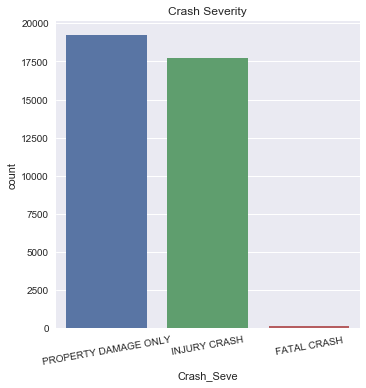

In [5]:
#plotting a count plot with seaborn
plt.style.use('seaborn')
cat = sns.catplot(x="Crash_Seve", kind="count", data=df)
sns.set(style="darkgrid")
plt.title("Crash Severity")
cat.set_xticklabels(rotation=10)
plt.savefig("countchart_severity.svg", format="svg")
plt.show()

#source:
#https://seaborn.pydata.org/tutorial/categorical.html
#https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

Furthermore, when we take a look into our second variable, one can see that most of the crashes occurred by 3 main cases. Those would be rear end crashes, angle crashes and non-collision crashes. We assume that non collision crashes are the ones where the second car was not involved. Rear end is also a most often case of a car crash as it tends to happen due to a driver not being focused on driving, it does also occur at lower speeds. It can also be seen that meeting and head on crashes are very low, they are also most fatal ones, that is why probably we do have low fatal crashes. This correlation will be questioned later on in the research.

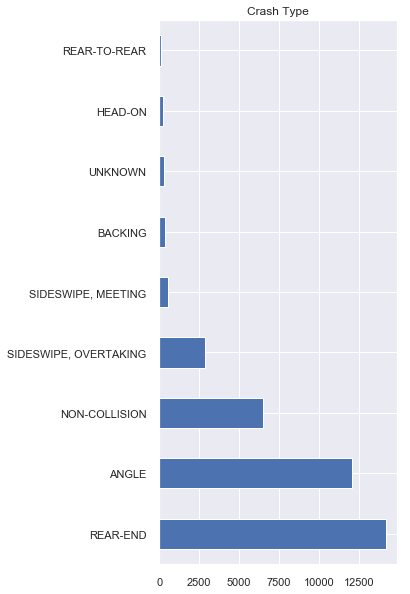

In [6]:
#plotting a second count plot
df['Crash_Type'].value_counts().head(30).plot(kind='barh', figsize=(6,10), title="Crash Type")
plt.gcf().subplots_adjust(left=0.35)
plt.savefig("countchart_type.svg", format="svg")
plt.show()

#source:
#https://stackoverflow.com/questions/44968324/how-to-expand-matplolib-window-without-stretching-the-plot

We also thought that before the analysis it would be interesting to see, how fast were both of the drivers. We took two boxplots in consideration in order to compare mean speeds of the both drivers. We can see that the both drivers tend to have a mean of around 30mph which is 48kmh, this is more than enough to cause damage to a car or a person. What is interesting that the vehicle 2 does have more or less the same Q1 value as the minimum value. This is mostly due to a fact that we had a lot of cases where there were no 2 vehicles included, thus V2_Driver_ variable being written as 0.

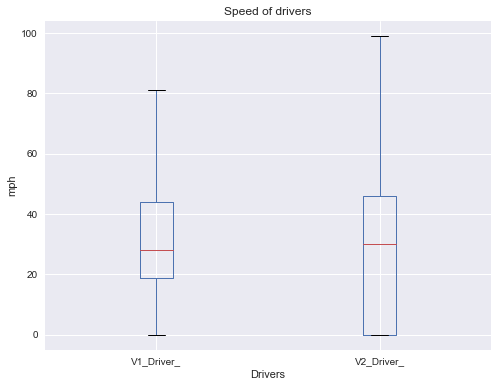

In [225]:
#creating two boxplots for "Speed of Drivers"
plt.style.use('seaborn')
b = df.boxplot(column=['V1_Driver_', 'V2_Driver_'])
b.axes.set_title("Speed of drivers")
b.set_xlabel("Drivers")
b.set_ylabel("mph")
plt.gcf().subplots_adjust(bottom=0.05)
plt.savefig('boxplot_speed.svg', format="svg")
plt.show()



At last we wanted to present the state of a driver at the time of an accident as well as the weather. What we noticed from these graphs is that our data needs to be grouped, as its split in more subgroups which do not make more sense and make groups such as "apparently normal" in drivers state and "dry" in weather oversampled compared to others. This also makes the impact of these variables on others very low as there are not diverse. In order to improve on this we decided that later on we will group these subgroups into just a few categories so that our data can make more sense. 

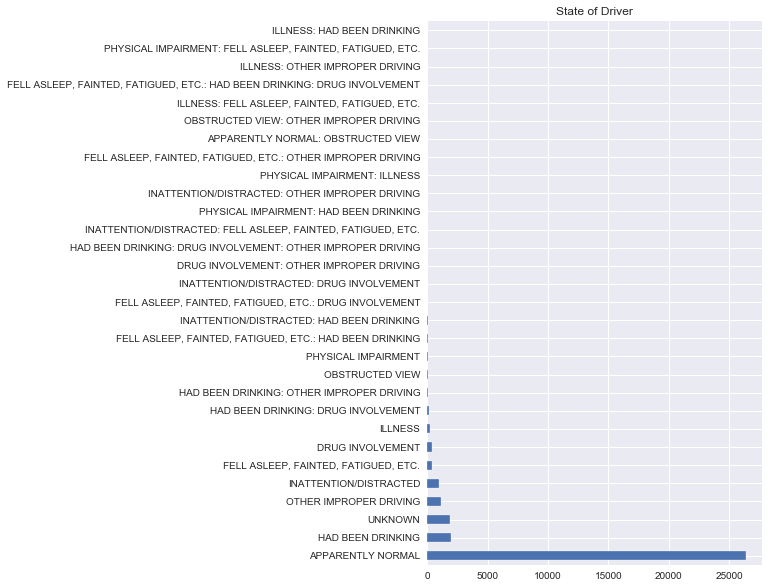

In [226]:
#plotting a third count plot
df['V1_Driver1'].value_counts().head(30).plot(kind='barh', figsize=(6,10), title="State of Driver")
plt.show()

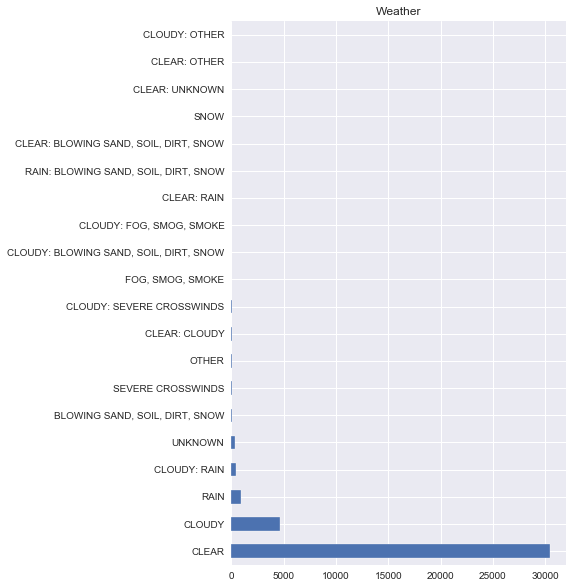

In [227]:
#plotting a fourth count plot
df['Weather'].value_counts().head(30).plot(kind='barh', figsize=(6,10), title="Weather")
plt.show()

# Duplicates

Using pandas we looked for duplicates in our dataset. However, we did not manage to find any as the dataset seems to have unique values mostly. Nevertheless, if that was not the case we have put the code in order to scan for duplicates with certain attributes and to put out exactly the columns which contain those duplicates so they can be handled later on. It would be maybe recommended to check for duplicates later on after the dataset is reorganized. 

In [228]:
#looking for duplicates
print("The number of duplicates in the data frame: " + str(df.duplicated().sum()))

The number of duplicates in the data frame: 0


# Missing Values


Here we scanned for missing values of each row that we had in our data set. Through this we have found that many columns do have a lot of missing values. Columns such as V1 and V2_Drive_1, V1 and V2_Most_Ha, V1 and V2_All_Eve, columns giving information in case accident occurred with something else than a car, etc. have more than 90% missing values.

In [229]:
#counting missing values of each column
df_miss = df.isna().sum()
print("Missing values of each row: ")
print(str(df_miss), "\n")

def total_miss(data):
    counter = 0
    for i in data:
        counter += i
    print("In total " + str(counter) + " values are missing")
    print("This means that " + str(round(counter/df.shape[0]/df.shape[1]*100, 2)) + "% of all values are missing")
    
total_miss(df_miss)

Missing values of each row: 
Crash_Seve        0
County            0
Crash_Date        0
Crash_Year        0
Crash_Time        0
Primary_St        0
Distance          0
Dir            8227
Secondary_        0
Weather          64
Fatalities        0
Injured           0
Property_D    17871
Injury_Typ    11680
Crash_Type        0
Total_Vehi        0
V1_Type           0
V1_Dir            0
V1_Driver_        0
V1_Lane_Nu    18353
V1_Action       128
V1_Driver1     3166
V1_Drive_1    36033
V1_Vehicle     5237
V1_Most_Ha    35100
V1_All_Eve    15666
V2_Type        6158
V2_Dir         7086
V2_Driver_        0
V2_Lane_Nu    20040
V2_Action      6189
V2_Driver1     7870
V2_Drive_1    37074
V2_Vehicle    33190
V2_Most_Ha    35522
V2_All_Eve    30139
First_Harm    34948
Nonmotoris    36014
Factors_Ro     3430
Lighting       3271
HWY_Factor     3265
Agency           17
Accident_R        0
Pedalcycli    36723
Pedestrian    36299
Motorcycli    36321
AnimalType    37055
CrashDateT        0
AREA       

### Handling the missing values

Given that many of our columns had more than 90% values missing we decided to drop many of them. All of these columns either have no impact on our research (having no sense on using them) or are just having too many missing values, making them irrelevant for further analysis. In the code below, it can be seen which columns we decided to drop. 

In [230]:
#dropping columns
def drop_columns(data):
    data.drop(columns= ["County", "Distance", 
                  "Dir", "Primary_St", 
                  "Crash_Time", "Secondary_", 
                  "Property_D", "Injury_Typ", 
                  "V1_Dir", "V1_Lane_Nu", 
                  "V1_Vehicle", "V1_Drive_1", 
                  "V1_Most_Ha", "V1_All_Eve", 
                  "V2_Dir", "V2_Lane_Nu", 
                  "V2_Drive_1", "V2_Vehicle", 
                  "V2_Most_Ha", "V2_All_Eve", 
                  "First_Harm", "HWY_Factor", 
                  "CrashDateT", "AREA", "PERIMETER", 
                  "CNTY_IS", "ACRES", "SQ_MILES", 
                  "ObjectId", "Nonmotoris","Pedalcycli", 
                  "Pedestrian", "Motorcycli", "WARD", 
                  "AnimalType", "SHADE", "Agency"], inplace=True)
drop_columns(df)

#### We can notice now that missing values are way lower than they were before, we reduced it from 27% to just 4%.

In [231]:
#missing values after dropping columns
df_miss2 = df.isna().sum()
print(df_miss2)
total_miss(df_miss2)

Crash_Seve       0
Crash_Date       0
Crash_Year       0
Weather         64
Fatalities       0
Injured          0
Crash_Type       0
Total_Vehi       0
V1_Type          0
V1_Driver_       0
V1_Action      128
V1_Driver1    3166
V2_Type       6158
V2_Driver_       0
V2_Action     6189
V2_Driver1    7870
Factors_Ro    3430
Lighting      3271
Accident_R       0
dtype: int64
In total 30276 values are missing
This means that 4.3% of all values are missing


Function value_counts can be used to see how our data is distributed in the columns we left. This helps us also to see which imputation method is best to use. 

### Imputation of values

The columns that were left but had missing values are very relevant to our research. That is why in order to use them to test correlation and answer our research questions, we will have to fill in the missing values. We decided that the method we will be using with most of the columns will be backward fill and forward fill method. As we have mostly categorical variables, we find it most convenient to use backward fill and forward fill for the imputation, this will also reduce oversampling the top categories per column. For the speed of the drivers we thought of using mean imputation method, but we found out that the value imputed here mixes our data too much thus we decided to go with backward and farward fill here as well.

In [232]:
#imputing values bfill/ffill
def filling_na(data):
    data.fillna(method="bfill", inplace=True)
    data.fillna(method="ffill", inplace=True)
#checking for missing values again
filling_na(df)
print(df.isna().sum())
#taking a look
df.head()

Crash_Seve    0
Crash_Date    0
Crash_Year    0
Weather       0
Fatalities    0
Injured       0
Crash_Type    0
Total_Vehi    0
V1_Type       0
V1_Driver_    0
V1_Action     0
V1_Driver1    0
V2_Type       0
V2_Driver_    0
V2_Action     0
V2_Driver1    0
Factors_Ro    0
Lighting      0
Accident_R    0
dtype: int64


,Crash_Seve,Crash_Date,Crash_Year,Weather,Fatalities,Injured,Crash_Type,Total_Vehi,V1_Type,V1_Driver_,V1_Action,V1_Driver1,V2_Type,V2_Driver_,V2_Action,V2_Driver1,Factors_Ro,Lighting,Accident_R
0,PROPERTY DAMAGE ONLY,2015-02-03T00:00:00.000Z,2015,CLEAR,0,0,NON-COLLISION,1,"SEDAN, 4 DOOR",25,GOING STRAIGHT,APPARENTLY NORMAL,"SEDAN, 4 DOOR",0,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DARK - CONTINUOUS LIGHTING,2074698
1,INJURY CRASH,2015-01-06T00:00:00.000Z,2015,CLEAR,0,2,ANGLE,2,"SEDAN, 4 DOOR",39,GOING STRAIGHT,APPARENTLY NORMAL,"SEDAN, 4 DOOR",45,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2073806
2,INJURY CRASH,2015-03-24T00:00:00.000Z,2015,CLEAR,0,1,ANGLE,2,CARRY-ALL,79,TURNING LEFT,APPARENTLY NORMAL,BUS,61,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2132710
3,INJURY CRASH,2015-01-22T00:00:00.000Z,2015,CLEAR,0,1,ANGLE,2,VAN,49,TURNING LEFT,APPARENTLY NORMAL,UTILITY,55,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2074321
4,INJURY CRASH,2015-01-08T00:00:00.000Z,2015,CLEAR,0,1,ANGLE,2,CARRY-ALL,66,MAKING U-TURN,APPARENTLY NORMAL,"SEDAN, 2 DOOR",49,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2073885


In [233]:
# Using value_counts() again to see if the methods for imputation worked properly.
for i in df.columns:
    print(df[i].value_counts(), "\n")

PROPERTY DAMAGE ONLY    19212
INJURY CRASH            17710
FATAL CRASH               164
Name: Crash_Seve, dtype: int64 

2016-12-22T00:00:00.000Z    90
2017-02-18T00:00:00.000Z    72
2017-01-12T00:00:00.000Z    71
2016-04-09T00:00:00.000Z    68
2017-01-13T00:00:00.000Z    68
2017-11-09T00:00:00.000Z    65
2015-01-11T00:00:00.000Z    64
2016-01-05T00:00:00.000Z    63
2016-12-16T00:00:00.000Z    63
2017-09-20T00:00:00.000Z    62
2017-10-25T00:00:00.000Z    59
2017-06-28T00:00:00.000Z    59
2017-07-05T00:00:00.000Z    59
2017-04-04T00:00:00.000Z    58
2016-07-01T00:00:00.000Z    58
2015-10-05T00:00:00.000Z    57
2016-04-30T00:00:00.000Z    57
2017-06-14T00:00:00.000Z    57
2017-11-01T00:00:00.000Z    56
2017-09-22T00:00:00.000Z    56
2017-05-10T00:00:00.000Z    56
2016-09-06T00:00:00.000Z    56
2017-03-30T00:00:00.000Z    56
2016-05-06T00:00:00.000Z    55
2017-10-05T00:00:00.000Z    55
2017-08-22T00:00:00.000Z    54
2017-04-20T00:00:00.000Z    54
2017-03-09T00:00:00.000Z    54
2016-07-1

Name: V2_Action, dtype: int64 

APPARENTLY NORMAL                                        36726
FELL ASLEEP, FAINTED, FATIGUED, ETC.                       147
HAD BEEN DRINKING                                          107
DRUG INVOLVEMENT                                            38
OTHER IMPROPER DRIVING                                      38
ILLNESS                                                      8
INATTENTION/DISTRACTED                                       6
FELL ASLEEP, FAINTED, FATIGUED, ETC.: OBSTRUCTED VIEW        5
HAD BEEN DRINKING: OTHER IMPROPER DRIVING                    3
PHYSICAL IMPAIRMENT                                          3
OBSTRUCTED VIEW                                              2
HAD BEEN DRINKING: DRUG INVOLVEMENT                          2
DRUG INVOLVEMENT: OTHER IMPROPER DRIVING                     1
Name: V2_Driver1, dtype: int64 

DRY                33800
WET                 3250
ICE                   17
WET: DRY               6
SNOW            

# Tidying and Cleansing

First renaming of columns was done. For the clear understanding of the data set one needs to know what each column represents. Our data set did not have such clear names, that is why we decided to rename most of the unclear columns for easier interpretation. Now we have a readable data set.

In [234]:
#renaming unclear column names
df.rename(columns={'Crash_Seve': 'Severeness',
                   'Crash_Date':'Date',
                   'Crash_Year':'Year',
                   'Total_Vehi': 'Total_Vehicle',
                   "V1_Driver_": "V1_Driver_mph",
                   "V2_Driver_": "V2_Driver_mph",
                   "V1_Type": "V1_Car_Type",
                   "V2_Type": "V2_Car_Type",
                   "V1_Driver1":"V1_Driver_State",
                   "V2_Driver1":"V2_Driver_State",
                   "Factors_Ro": "Road_Factor",
                   "Accident_R": "Accident_ID"}, inplace=True)
df.head()

,Severeness,Date,Year,Weather,Fatalities,Injured,Crash_Type,Total_Vehicle,V1_Car_Type,V1_Driver_mph,V1_Action,V1_Driver_State,V2_Car_Type,V2_Driver_mph,V2_Action,V2_Driver_State,Road_Factor,Lighting,Accident_ID
0,PROPERTY DAMAGE ONLY,2015-02-03T00:00:00.000Z,2015,CLEAR,0,0,NON-COLLISION,1,"SEDAN, 4 DOOR",25,GOING STRAIGHT,APPARENTLY NORMAL,"SEDAN, 4 DOOR",0,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DARK - CONTINUOUS LIGHTING,2074698
1,INJURY CRASH,2015-01-06T00:00:00.000Z,2015,CLEAR,0,2,ANGLE,2,"SEDAN, 4 DOOR",39,GOING STRAIGHT,APPARENTLY NORMAL,"SEDAN, 4 DOOR",45,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2073806
2,INJURY CRASH,2015-03-24T00:00:00.000Z,2015,CLEAR,0,1,ANGLE,2,CARRY-ALL,79,TURNING LEFT,APPARENTLY NORMAL,BUS,61,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2132710
3,INJURY CRASH,2015-01-22T00:00:00.000Z,2015,CLEAR,0,1,ANGLE,2,VAN,49,TURNING LEFT,APPARENTLY NORMAL,UTILITY,55,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2074321
4,INJURY CRASH,2015-01-08T00:00:00.000Z,2015,CLEAR,0,1,ANGLE,2,CARRY-ALL,66,MAKING U-TURN,APPARENTLY NORMAL,"SEDAN, 2 DOOR",49,GOING STRAIGHT,APPARENTLY NORMAL,DRY,DAYLIGHT,2073885


Besides renaming the columns one must also have a clear order. This makes the interpretation but also a comparison of data easier. That is why we tried to order our data by groups they belong to, example of that everything that has to do with time we put in the beginning. Furthermore, we tried to group each of the factors for driver 1 and driver 2 together, so that if needed they can be compared as well in the table format.


In [235]:
#Changing the order of the columns

df = df[["Date", "Year", "Severeness", 
         "Crash_Type","Fatalities",
         "Injured","Weather","Road_Factor",
         "Lighting", "Total_Vehicle",
         "V1_Car_Type","V2_Car_Type",
         "V1_Driver_mph","V2_Driver_mph",
         "V1_Action","V2_Action",
         "V1_Driver_State","V2_Driver_State", 
         "Accident_ID"]]
df.head(100)

,Date,Year,Severeness,Crash_Type,Fatalities,Injured,Weather,Road_Factor,Lighting,Total_Vehicle,V1_Car_Type,V2_Car_Type,V1_Driver_mph,V2_Driver_mph,V1_Action,V2_Action,V1_Driver_State,V2_Driver_State,Accident_ID
0,2015-02-03T00:00:00.000Z,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DARK - CONTINUOUS LIGHTING,1,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",25,0,GOING STRAIGHT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2074698
1,2015-01-06T00:00:00.000Z,2015,INJURY CRASH,ANGLE,0,2,CLEAR,DRY,DAYLIGHT,2,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",39,45,GOING STRAIGHT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2073806
2,2015-03-24T00:00:00.000Z,2015,INJURY CRASH,ANGLE,0,1,CLEAR,DRY,DAYLIGHT,2,CARRY-ALL,BUS,79,61,TURNING LEFT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2132710
3,2015-01-22T00:00:00.000Z,2015,INJURY CRASH,ANGLE,0,1,CLEAR,DRY,DAYLIGHT,2,VAN,UTILITY,49,55,TURNING LEFT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2074321
4,2015-01-08T00:00:00.000Z,2015,INJURY CRASH,ANGLE,0,1,CLEAR,DRY,DAYLIGHT,2,CARRY-ALL,"SEDAN, 2 DOOR",66,49,MAKING U-TURN,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2073885
5,2015-01-26T00:00:00.000Z,2015,INJURY CRASH,ANGLE,0,2,CLOUDY: RAIN,DRY,DARK - SPOT LIGHTING,2,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",48,23,TURNING LEFT,GOING STRAIGHT,HAD BEEN DRINKING,APPARENTLY NORMAL,2074475
6,2015-02-08T00:00:00.000Z,2015,INJURY CRASH,NON-COLLISION,0,1,CLEAR,DRY,DARK - CONTINUOUS LIGHTING,1,UNKNOWN,PICKUP,0,0,GOING STRAIGHT,STOPPED,APPARENTLY NORMAL,APPARENTLY NORMAL,2122131
7,2015-04-12T00:00:00.000Z,2015,INJURY CRASH,REAR-END,0,1,CLEAR,DRY,DAYLIGHT,2,"SEDAN, 4 DOOR",PICKUP,51,17,GOING STRAIGHT,STOPPED,APPARENTLY NORMAL,APPARENTLY NORMAL,2133384
8,2015-01-28T00:00:00.000Z,2015,INJURY CRASH,HEAD-ON,0,2,CLOUDY,DRY,DAYLIGHT,2,CARRY-ALL,"SEDAN, 4 DOOR",25,36,TURNING LEFT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2074524
9,2015-05-06T00:00:00.000Z,2015,INJURY CRASH,NON-COLLISION,0,1,CLOUDY,DRY,DARK - CONTINUOUS LIGHTING,1,CARRY-ALL,CARRY-ALL,44,0,TURNING LEFT,TURNING RIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2134175


After grouping we noticed that dates of car crashes had a format that was not very pleasant. That is why we decided to change the format of the date column to the style that is more interpretable.

In [236]:
#deleting unnecessary digits in "Date"
df['Date'] = df['Date'].str[:10]
df.head()

,Date,Year,Severeness,Crash_Type,Fatalities,Injured,Weather,Road_Factor,Lighting,Total_Vehicle,V1_Car_Type,V2_Car_Type,V1_Driver_mph,V2_Driver_mph,V1_Action,V2_Action,V1_Driver_State,V2_Driver_State,Accident_ID
0,2015-02-03,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DARK - CONTINUOUS LIGHTING,1,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",25,0,GOING STRAIGHT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2074698
1,2015-01-06,2015,INJURY CRASH,ANGLE,0,2,CLEAR,DRY,DAYLIGHT,2,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",39,45,GOING STRAIGHT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2073806
2,2015-03-24,2015,INJURY CRASH,ANGLE,0,1,CLEAR,DRY,DAYLIGHT,2,CARRY-ALL,BUS,79,61,TURNING LEFT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2132710
3,2015-01-22,2015,INJURY CRASH,ANGLE,0,1,CLEAR,DRY,DAYLIGHT,2,VAN,UTILITY,49,55,TURNING LEFT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2074321
4,2015-01-08,2015,INJURY CRASH,ANGLE,0,1,CLEAR,DRY,DAYLIGHT,2,CARRY-ALL,"SEDAN, 2 DOOR",66,49,MAKING U-TURN,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2073885


As stated in the begining some of our columns do have too many subgroups (categories). From our point of view, we think that is a bit too much for a proper analysis. That is why we decided to create few main groups for some of these columns and devide them accordingly. Yes, through this process we manipulate the data a bit but we could not think of any other proper solution of grouping without manipulating our data, and leaving the columns be would just make our later analysis of correlation even lower. After all, the data we grouped has at least the first expression in common.
We also inserted one additional column, that is called "Season", which can be used for further analysis as well.

In [237]:
#setting differently named but similar values to the same value to reduce variety of categories 
#source: https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas


weather = ["CLEAR", "CLOUDY", "RAIN", "UNKNOWN", "BLOWING SAND, SOIL, DIRT, SNOW"]

for i in weather:
    df.loc[df['Weather'].str[0:4] == i[0:4],['Weather']] = i

weather1 = ["SNOW", "FOG, SMOG, SMOKE", "UNKNOWN"]
for a in weather1:
    df.loc[df['Weather'] == a, ['Weather']] = "OTHER"
    
################################################################################################################################

       
un_actions = ["LEAVING PARK POSITION", 
              "DRIVERLESS-MOVING VEHICLE", 
              "OTHER TURNING MOVEMENT", 
              "DRIVERLESS VEHICLE", 
              "ENTERING PARK POSITION", 
              "RACING", "PARKED"]
for i in un_actions:
    df.loc[df["V1_Action"] == i, ["V1_Action"]] = "OTHER"
for i in un_actions:
    df.loc[df["V2_Action"] == i, ["V2_Action"]] = "OTHER"

################################################################################################################################
    
    
states = ["HAD BEEN DRINKING",
          "FELL ASLEEP, FAINTED, FATIGUED, ETC.",
          "ILLNESS", 
          "INATTENTION/DISTRACTED", 
          "PHYSICAL IMPAIRMENT", 
          "APPARENTLY NORMAL", 
          "OBSTRUCTED VIEW",
          "DRUG INVOLVEMENT"]
for i in states:
    df.loc[df['V1_Driver_State'].str[0:4] == i[0:4], ['V1_Driver_State']] = i
for i in states:
    df.loc[df['V2_Driver_State'].str[0:4] == i[0:4], ['V2_Driver_State']] = i
    
################################################################################################################################


road = ["DRY", "WET",
        "ICE", "SNOW", 
        "OTHER"]
for i in road:
    df.loc[df['Road_Factor'].str[0:1] == i[0:1], ['Road_Factor']] = i
df.loc[df['Road_Factor'] == "UNKNOWN", ['Road_Factor']] = "OTHER"

################################################################################################################################

    
light = ["DAYLIGHT", "DARK", 
         "DUSK", "DAWN"]
for i in light:
    df.loc[df['Lighting'].str[0:3] == i[0:3], ['Lighting']] = i

################################################################################################################################

#inserting a new column which gives information about season
    
season = ["Winter", "Spring", "Summer", "Fall"]
df["Season"]  = ""

df.loc[df['Date'].str[5:7] == "12", ['Season']] = season[0]
df.loc[df['Date'].str[5:7] == "01", ['Season']] = season[0]
df.loc[df['Date'].str[5:7] == "02", ['Season']] = season[0]

df.loc[df['Date'].str[5:7] == "03", ['Season']] = season[1]
df.loc[df['Date'].str[5:7] == "04", ['Season']] = season[1]
df.loc[df['Date'].str[5:7] == "05", ['Season']] = season[1]

df.loc[df['Date'].str[5:7] == "06", ['Season']] = season[2]
df.loc[df['Date'].str[5:7] == "07", ['Season']] = season[2]
df.loc[df['Date'].str[5:7] == "08", ['Season']] = season[2]

df.loc[df['Date'].str[5:7] == "09", ['Season']] = season[3]
df.loc[df['Date'].str[5:7] == "10", ['Season']] = season[3]
df.loc[df['Date'].str[5:7] == "11", ['Season']] = season[3]




In [238]:
#changing data type of the column "Date" from string to datetime (making it sortable)
df['Date']=pd.to_datetime(df.Date)
#sort values according to date
df.sort_values(by=['Date']).reset_index(drop=True)

,Date,Year,Severeness,Crash_Type,Fatalities,Injured,Weather,Road_Factor,Lighting,Total_Vehicle,V1_Car_Type,V2_Car_Type,V1_Driver_mph,V2_Driver_mph,V1_Action,V2_Action,V1_Driver_State,V2_Driver_State,Accident_ID,Season
0,2015-01-01,2015,PROPERTY DAMAGE ONLY,"SIDESWIPE, OVERTAKING",0,0,CLOUDY,WET,DARK,2,"SEDAN, 4 DOOR",CONVERTIBLE,22,24,GOING STRAIGHT,STOPPED,HAD BEEN DRINKING,APPARENTLY NORMAL,2073648,Winter
1,2015-01-01,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DAWN,1,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",27,0,GOING STRAIGHT,STOPPED,HAD BEEN DRINKING,APPARENTLY NORMAL,2284085,Winter
2,2015-01-01,2015,INJURY CRASH,NON-COLLISION,0,2,CLEAR,DRY,DAYLIGHT,1,"SEDAN, 4 DOOR",AMBULANCE,26,0,NOT REPORTED,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2284089,Winter
3,2015-01-01,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DARK,1,"SEDAN, 2 DOOR",AMBULANCE,35,0,TURNING LEFT,GOING STRAIGHT,HAD BEEN DRINKING,APPARENTLY NORMAL,2284079,Winter
4,2015-01-01,2015,PROPERTY DAMAGE ONLY,ANGLE,0,0,CLOUDY,WET,DARK,2,"SEDAN, 4 DOOR",CARRY-ALL,22,35,OTHER,STOPPED,HAD BEEN DRINKING,APPARENTLY NORMAL,2073645,Winter
5,2015-01-01,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DAYLIGHT,1,UNKNOWN,"SEDAN, 4 DOOR",0,0,TURNING RIGHT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,2073659,Winter
6,2015-01-01,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DARK,1,"SEDAN, 4 DOOR",PICKUP,22,0,UNKNOWN,GOING STRAIGHT,HAD BEEN DRINKING,APPARENTLY NORMAL,2073647,Winter
7,2015-01-01,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DARK,1,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",41,0,GOING STRAIGHT,STOPPED,APPARENTLY NORMAL,APPARENTLY NORMAL,2172491,Winter
8,2015-01-01,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,DRY,DAYLIGHT,1,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",23,0,GOING STRAIGHT,GOING STRAIGHT,HAD BEEN DRINKING,APPARENTLY NORMAL,2073658,Winter
9,2015-01-01,2015,PROPERTY DAMAGE ONLY,NON-COLLISION,0,0,CLEAR,WET,DARK,1,"SEDAN, 4 DOOR","SEDAN, 2 DOOR",38,0,GOING STRAIGHT,STOPPED,APPARENTLY NORMAL,APPARENTLY NORMAL,2284103,Winter


# Analytics

In the following part we will analyse and try to answer both of our research question. In order to see which variables could have an impact on our main two we will use a correlation method. Afterwards this data will be presented through a heatmap. Before we start with anything, we will remove columns that are "responsible" for time, as they might mess our data results. 

In [239]:
#saving df in df1 for later
df1 = df

#dropping additional columns (pointless regarding correlation e.g. "Accident_ID")
df.drop(columns = ["Date", "Year", "Accident_ID", "Fatalities"], inplace=True)
df.head()

,Severeness,Crash_Type,Injured,Weather,Road_Factor,Lighting,Total_Vehicle,V1_Car_Type,V2_Car_Type,V1_Driver_mph,V2_Driver_mph,V1_Action,V2_Action,V1_Driver_State,V2_Driver_State,Season
0,PROPERTY DAMAGE ONLY,NON-COLLISION,0,CLEAR,DRY,DARK,1,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",25,0,GOING STRAIGHT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,Winter
1,INJURY CRASH,ANGLE,2,CLEAR,DRY,DAYLIGHT,2,"SEDAN, 4 DOOR","SEDAN, 4 DOOR",39,45,GOING STRAIGHT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,Winter
2,INJURY CRASH,ANGLE,1,CLEAR,DRY,DAYLIGHT,2,CARRY-ALL,BUS,79,61,TURNING LEFT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,Spring
3,INJURY CRASH,ANGLE,1,CLEAR,DRY,DAYLIGHT,2,VAN,UTILITY,49,55,TURNING LEFT,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,Winter
4,INJURY CRASH,ANGLE,1,CLEAR,DRY,DAYLIGHT,2,CARRY-ALL,"SEDAN, 2 DOOR",66,49,MAKING U-TURN,GOING STRAIGHT,APPARENTLY NORMAL,APPARENTLY NORMAL,Winter


## Research Question 1
   
Now we will try to analyze and see if different columns have an impact on the result of a crash (Severeness). We are doing this because we want to know what is most responsible for fatal crashes. It will also be interesting to see if other outcomes of a crash corelate with different columns. Of course, higher the positive number higher the correlation between two variables.

In [240]:
#one hot encoding to make categorical data computable
df = pd.get_dummies(df)

#taking a first look into the correlation regarding "Crash_Severeness"
corrs_prop = df[df.columns[1:]].corr()['Severeness_PROPERTY DAMAGE ONLY'][:].sort_values(ascending = False)
corrs_inj = df[df.columns[1:]].corr()['Severeness_INJURY CRASH'][:].sort_values(ascending = False)
corrs_fat = df[df.columns[1:]].corr()['Severeness_FATAL CRASH'][:].sort_values(ascending = False)


print(corrs_fat)
print(corrs_inj)
print(corrs_prop)

Severeness_FATAL CRASH                                  1.000000
V2_Driver_State_DRUG INVOLVEMENT                        0.173373
V2_Car_Type_MOTORCYCLE                                  0.095197
V1_Car_Type_ATV                                         0.077915
V1_Car_Type_MOTORIZED SCOOTER                           0.077915
Crash_Type_NON-COLLISION                                0.073297
V2_Car_Type_MOPED                                       0.072370
V1_Car_Type_MOTORCYCLE                                  0.058781
V1_Driver_State_DRUG INVOLVEMENT                        0.052076
V1_Driver_State_UNKNOWN                                 0.040028
V1_Driver_State_HAD BEEN DRINKING                       0.040022
Lighting_DARK                                           0.035504
V2_Car_Type_OTHER                                       0.033729
V1_Car_Type_MULTI-WHEEL                                 0.031104
V2_Car_Type_STATION WAGON                               0.031060
V1_Driver_mph            

As the fatal crashes were most interesting for our analysis, we also performed an OLS regression. Here we will basically see the summary of all factors impact the severeness of a crash that ended fatally. 

In [241]:
#removing severity columns out of a list
x = list(df.columns)
for i in x:
    if i[0:3] == "Sev":
        x.remove(i)

#creating statistical output regarding regression with stat.math OLS
#defining variables for statistical analysis
Y = df[["Severeness_FATAL CRASH"]]
X = df[x]

#computing statistical output
model = sm.OLS(Y,X).fit()
print(model.summary())

#source:
#https://stackoverflow.com/questions/57385279/what-is-the-difference-between-statsmodels-api-sm-ols-and-statsmodels-formula-ap

                              OLS Regression Results                              
Dep. Variable:     Severeness_FATAL CRASH   R-squared:                       0.087
Model:                                OLS   Adj. R-squared:                  0.082
Method:                     Least Squares   F-statistic:                     17.83
Date:                    Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                            16:30:04   Log-Likelihood:                 49661.
No. Observations:                   37086   AIC:                        -9.893e+04
Df Residuals:                       36889   BIC:                        -9.725e+04
Df Model:                             196                                         
Covariance Type:                nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Now we will create a list for all the columns that have p-values lower than 0.05. These are columns that prove our hyphothes H0 as incorrect, that is why they are siginifcant to show in the heatmap.

In [243]:
#creating list containing each attribute and its p-values from above
pval_list = model.pvalues

#get list of columns with p-value < 0.05 (significance)
sign_attributes = []
for n in range(0, len(pval_list)):
    if pval_list[n] < 0.05:
        sign_attributes.append(pval_list.index[n])

print("Attributes with significant correlation:")       
sign_attributes

Attributes with significant correlation:


['Injured',
 'Total_Vehicle',
 'V1_Driver_mph',
 'Severeness_INJURY CRASH',
 'Crash_Type_ANGLE',
 'Crash_Type_HEAD-ON',
 'Crash_Type_NON-COLLISION',
 'Weather_CLEAR',
 'Weather_CLOUDY',
 'Weather_RAIN',
 'V1_Car_Type_3-DOOR',
 'V1_Car_Type_ATV',
 'V1_Car_Type_BUS',
 'V1_Car_Type_CARRY-ALL',
 'V1_Car_Type_CHASSIS AND CAB',
 'V1_Car_Type_CONCRETE MIXER',
 'V1_Car_Type_CONVERTIBLE',
 'V1_Car_Type_COUPE',
 'V1_Car_Type_FLATBED OR PLATFORM',
 'V1_Car_Type_GARBAGE OR REFUSE',
 'V1_Car_Type_HARDTOP, 2 DOOR',
 'V1_Car_Type_HARDTOP, 4 DOOR',
 'V1_Car_Type_HATCHBACK, 2 DOOR',
 'V1_Car_Type_HATCHBACK, 4 DOOR',
 'V1_Car_Type_HATCHBACK/FASTBACK',
 'V1_Car_Type_LIMOUSINE',
 'V1_Car_Type_MOTORIZED HOME',
 'V1_Car_Type_MOTORIZED SCOOTER',
 'V1_Car_Type_MOTORSCOOTER',
 'V1_Car_Type_MULTI-WHEEL',
 'V1_Car_Type_OTHER',
 'V1_Car_Type_PICKUP',
 'V1_Car_Type_PICKUP WITH MOUNTED CAMPER',
 'V1_Car_Type_SEDAN',
 'V1_Car_Type_SEDAN, 2 DOOR',
 'V1_Car_Type_SEDAN, 4 DOOR',
 'V1_Car_Type_SEMI',
 'V1_Car_Type_STAKE

We will proceed to create a heatmap with all the variables that are relevant regarding "Severeness_FATAL CRASH". With this we hope to visually see, what has the most impact on the outcomes of a crash. It is important to state that some of the columns have very low samples compared to others. That is why any kind of positive correlation in those columns that are low sampled, is significant. 

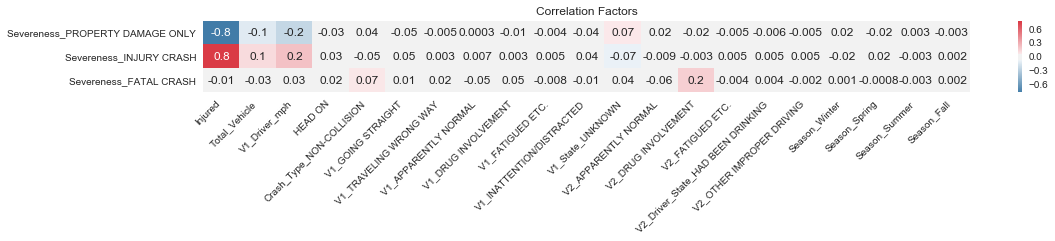

In [244]:
#creating a heatmap how the correlation between the severeness levels (PROPERTY DAMAGE ONLY, INJURED CRASH and FATAL CRASH)
#and the variables with statistical significance regarding FATAL CRASH
df_corr = df[["Severeness_PROPERTY DAMAGE ONLY", 
              "Severeness_INJURY CRASH", "Severeness_FATAL CRASH", 'Injured',
              'Total_Vehicle', 'V1_Driver_mph', 'Crash_Type_HEAD-ON',
              'Crash_Type_NON-COLLISION', 'V1_Action_GOING STRAIGHT',
              'V1_Action_TRAVELING WRONG WAY',
              'V1_Driver_State_APPARENTLY NORMAL',
              'V1_Driver_State_DRUG INVOLVEMENT', 
              'V1_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.',
              'V1_Driver_State_INATTENTION/DISTRACTED',
              'V1_Driver_State_UNKNOWN',
              'V2_Driver_State_APPARENTLY NORMAL',
              'V2_Driver_State_DRUG INVOLVEMENT',
              'V2_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.',
              'V2_Driver_State_HAD BEEN DRINKING',
              'V2_Driver_State_OTHER IMPROPER DRIVING', 'Season_Winter','Season_Spring', 
              'Season_Summer', 'Season_Fall']]

#calculating correlation coefficients for df_corr
corr = df_corr.corr()
#extracting the first 3 rows (severity rows)
corr = corr.iloc[0:3,:]

#renaming columns to reduce name length
corr.rename(columns={'Severeness_PROPERTY DAMAGE ONLY': 'PROPERTY DAMAGE ONLY',
                     'Severeness_INJURY CRASH':'INJURY CRASH',
                     "Severeness_FATAL CRASH": "FATAL CRASH",
                     "Crash_Type_HEAD-ON": "HEAD ON",
                     'V1_Action_GOING STRAIGHT': 'V1_GOING STRAIGHT',
                     "V1_Action_TRAVELING WRONG WAY": "V1_TRAVELING WRONG WAY",
                     "V2_Driver_": "V2_Driver_mph",
                     "V1_Driver_State_APPARENTLY NORMAL": "V1_APPARENTLY NORMAL",
                     "V1_Driver_State_DRUG INVOLVEMENT": "V1_DRUG INVOLVEMENT",
                     "V1_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.": "V1_FATIGUED ETC.",
                     "V1_Driver_State_INATTENTION/DISTRACTED": "V1_INATTENTION/DISTRACTED",
                     "V1_Driver_State_UNKNOWN": "V1_State_UNKNOWN",
                     "V2_Driver_State_APPARENTLY NORMAL": "V2_APPARENTLY NORMAL",
                     "V2_Driver_State_DRUG INVOLVEMENT": "V2_DRUG INVOLVEMENT",
                     "V2_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.": "V2_FATIGUED ETC.",
                     "V2_Driver_State_INATTENTION/DISTRACTED": "V2_INATTENTION/DISTRACTED",
                     "V2_Driver_State_OTHER IMPROPER DRIVING": "V2_OTHER IMPROPER DRIVING"}, inplace=True)

#dropping severity columns
corr.drop(columns= ["FATAL CRASH", "INJURY CRASH", "PROPERTY DAMAGE ONLY"], inplace = True)

#defining the first heatmap
fig, ax = plt.subplots(figsize=(18,3))
colormap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
heat = sns.heatmap(corr, cmap=colormap, center=0, annot=True, fmt=".1g") #only show each Sex with the correlation of each variables
plt.title('Correlation Factors')

#plotting the first heatmap
plt.gcf().subplots_adjust(left = 0.16, bottom=0.55)
heat.set_xticklabels(heat.get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.savefig("heatmap_rq1.svg", format="svg")
plt.show()

#source: https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
#https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe

# Research Question 2

Our second research question was focused on investigating the correlation of our columns with the Crash type which is in principle by which action did it come to the outcome or in our case a crash. There we have four most common and most interesting types of crashes, which are: head on crash, rear-end, angle and overtaking. We assume that rear and crashes will show strongest correlations as they are most common types of crashes. Nevertheless, we are interested to see if any other crash types mentioned have stronger correlations with some of the columns in our data set. In the following steps we used the same procedure as we used in answering our first question.

In [245]:
#creating statistical output regarding regression with stat.math OLS
#defining variables for statistical analysis
Y = df[["Crash_Type_HEAD-ON"]]
X = df[['Injured', 'Total_Vehicle', 'V1_Driver_mph', 'V2_Driver_mph',
        'Weather_BLOWING SAND, SOIL, DIRT, SNOW',
       'Weather_CLEAR', 'Weather_CLOUDY', 'Weather_OTHER', 'Weather_RAIN',
       'Weather_SEVERE CROSSWINDS', 'Road_Factor_DRY',
       'Road_Factor_ICE', 'Road_Factor_OTHER', 'Road_Factor_SNOW','Road_Factor_WET', 'Lighting_DARK',
       'Lighting_DAWN', 'Lighting_DAYLIGHT', 'Lighting_DUSK', 'Lighting_OTHER',
       'Lighting_UNKNOWN', 'V1_Action_BACKING UP', 'V1_Action_CHANGING LANES',
       'V1_Action_GOING STRAIGHT', 'V1_Action_MAKING U-TURN',
       'V1_Action_NOT REPORTED', 'V1_Action_OTHER',
       'V1_Action_PASSING OTHER VEHICLE', 'V1_Action_STOPPED',
       'V1_Action_TRAVELING WRONG WAY', 'V1_Action_TURNING LEFT',
       'V1_Action_TURNING RIGHT', 'V1_Action_UNKNOWN', 'V2_Action_BACKING UP',
       'V2_Action_CHANGING LANES', 'V2_Action_GOING STRAIGHT',
       'V2_Action_MAKING U-TURN', 'V2_Action_NOT REPORTED', 'V2_Action_OTHER',
       'V2_Action_PASSING OTHER VEHICLE', 'V2_Action_STOPPED',
       'V2_Action_TRAVELING WRONG WAY', 'V2_Action_TURNING LEFT',
       'V2_Action_TURNING RIGHT', 'V2_Action_UNKNOWN',
       'V1_Driver_State_APPARENTLY NORMAL', 'V1_Driver_State_DRUG INVOLVEMENT',
       'V1_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.',
       'V1_Driver_State_HAD BEEN DRINKING', 'V1_Driver_State_ILLNESS',
       'V1_Driver_State_INATTENTION/DISTRACTED',
       'V1_Driver_State_OBSTRUCTED VIEW',
       'V1_Driver_State_OTHER IMPROPER DRIVING',
       'V1_Driver_State_PHYSICAL IMPAIRMENT', 'V1_Driver_State_UNKNOWN',
       'V2_Driver_State_APPARENTLY NORMAL', 'V2_Driver_State_DRUG INVOLVEMENT',
       'V2_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.',
       'V2_Driver_State_HAD BEEN DRINKING', 'V2_Driver_State_ILLNESS',
       'V2_Driver_State_INATTENTION/DISTRACTED',
       'V2_Driver_State_OBSTRUCTED VIEW',
       'V2_Driver_State_OTHER IMPROPER DRIVING',
       'V2_Driver_State_PHYSICAL IMPAIRMENT', 
        "Severeness_INJURY CRASH", "Severeness_PROPERTY DAMAGE ONLY", "Severeness_FATAL CRASH"]]


#computing statistical output
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Crash_Type_HEAD-ON   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     26.41
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          2.11e-280
Time:                        16:30:07   Log-Likelihood:                 44994.
No. Observations:               37086   AIC:                        -8.987e+04
Df Residuals:                   37026   BIC:                        -8.936e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [246]:
#creating list containing each column and its p-values from above
pval_list = model.pvalues

#get list of columns with p-value < 0.05
sign_attributes2 = []
for n in range(0, len(pval_list)):
    if pval_list[n] < 0.05:
        sign_attributes2.append(pval_list.index[n])


print("Attributes with significant correlation:")       
sign_attributes2

Attributes with significant correlation:


['Injured',
 'Total_Vehicle',
 'V2_Driver_mph',
 'Weather_CLEAR',
 'Weather_CLOUDY',
 'Weather_RAIN',
 'Road_Factor_DRY',
 'Road_Factor_ICE',
 'Road_Factor_SNOW',
 'Road_Factor_WET',
 'V1_Action_BACKING UP',
 'V1_Action_CHANGING LANES',
 'V1_Action_GOING STRAIGHT',
 'V1_Action_MAKING U-TURN',
 'V1_Action_NOT REPORTED',
 'V1_Action_OTHER',
 'V1_Action_PASSING OTHER VEHICLE',
 'V1_Action_STOPPED',
 'V1_Action_TRAVELING WRONG WAY',
 'V1_Action_TURNING LEFT',
 'V1_Action_TURNING RIGHT',
 'V1_Action_UNKNOWN',
 'V2_Action_BACKING UP',
 'V2_Action_OTHER',
 'V1_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.',
 'V1_Driver_State_HAD BEEN DRINKING',
 'V1_Driver_State_ILLNESS',
 'Severeness_INJURY CRASH',
 'Severeness_PROPERTY DAMAGE ONLY',
 'Severeness_FATAL CRASH']

In [247]:
#appending other "Crash_Type" variables to the significant attributes list to plot them in the heat map
sign_attributes2.append("Crash_Type_HEAD-ON")
sign_attributes2.append("Crash_Type_REAR-END")
sign_attributes2.append("Crash_Type_ANGLE")
sign_attributes2.append("Crash_Type_SIDESWIPE, OVERTAKING")

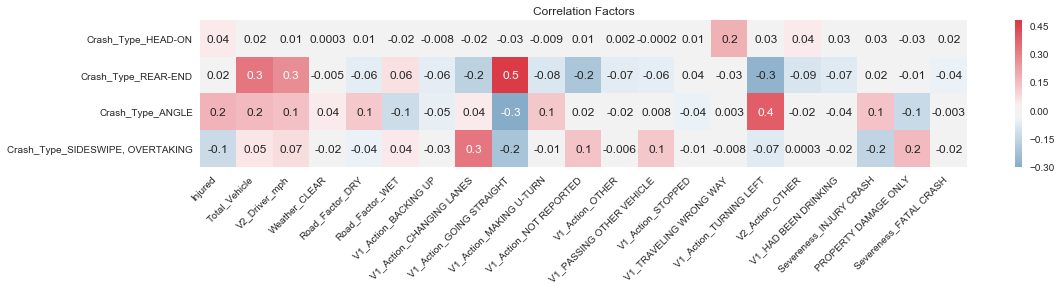

In [248]:
#creating a heatmap how the correlation between the severeness levels (PROPERTY DAMAGE ONLY, INJURED CRASH and FATAL CRASH)
#and the variables with statistical significance regarding FATAL CRASH

#calculating the correlation coeffitients for the wanted columns
df_corr = df[sign_attributes2]
corr = df_corr.corr()
corr = corr.iloc[-4:,:]

#dropping columns with almost no correlation due to visual overload
corr.drop(columns= ["Crash_Type_HEAD-ON", "Crash_Type_REAR-END", "Crash_Type_ANGLE",
                    "Crash_Type_SIDESWIPE, OVERTAKING", "Weather_RAIN", "Weather_CLOUDY", 
                    "V1_Action_TURNING RIGHT", "V1_Action_UNKNOWN", 
                    "V1_Driver_State_FELL ASLEEP, FAINTED, FATIGUED, ETC.",
                    "V1_Driver_State_ILLNESS", "Road_Factor_ICE", 
                    "Road_Factor_SNOW", "V2_Action_BACKING UP"], inplace = True)

#renaming some columns to reduce name length
corr.rename(columns={"V1_Action_PASSING OTHER VEHICLE": "V1_PASSING OTHER VEHICLE",
                    "V1_Action_TRAVELING WRONG WAY": "V1_TRAVELING WRONG WAY",
                    "V1_Driver_State_HAD BEEN DRINKING": "V1_HAD BEEN DRINKING",
                    "Severeness_PROPERTY DAMAGE ONLY": "PROPERTY DAMAGE ONLY"}, inplace=True)
        

#defining the second heatmap
fig, ax = plt.subplots(figsize=(18,3))
colormap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
heat = sns.heatmap(corr, cmap=colormap, center=0, annot=True, fmt='.1g') 
plt.title('Correlation Factors')

#plotting the second heatmap
plt.gcf().subplots_adjust(left = 0.16, bottom=0.2)
heat.set_xticklabels(heat.get_xticklabels(), rotation=45, horizontalalignment='right') 
#plt.savefig("heatmap_rq2.svg", format="svg")
plt.show()

#source: https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot

As assumed before rear end crashes have strongest and weakest correlations with variables presented. Main factor for that would be the fact that the most of our cases are rear end crashes. For example, it is very logical that it has a strong correlation with "Going Straight" column. In order for a rear end crash to happen one has to drive straight. Similar case is for Angle crash and "Turning Left". It is interesting that angular crashes result in injury while overtaking crashes mostly result in property damage. Furthermore, only Crash type that has positive correlation with a crash ending fatally is Head-on crash. This is because they are in fact most dangerous types of crashes.

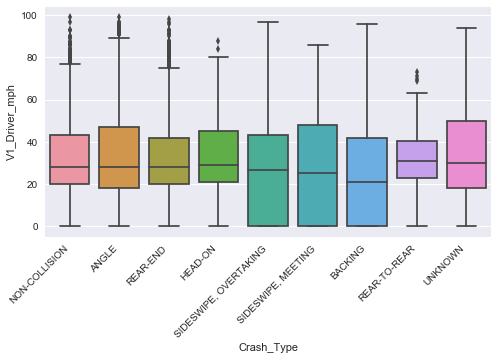

In [249]:
#creating Boxplots of Crash Types
ax = sns.boxplot(x="Crash_Type", y="V1_Driver_mph", data=df1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig("boxplot_rq2.svg", format="svg")
plt.show()

After we were finished with the correlation we also wanted to see if the speed differs by the crash type, thus we created box plots for each of the crash type and compared them on miles per hour basis. We noticed one interesting factor is that rear to rear crashes have the highest median. This cannot be taken like relevant as we had under 100 cases of rear to rear crashes and they do have outliers as well. However, head on crashes as expected are the crashes with highest median, while backing crashes have the lowest one. This is normal as when using reverse one cannot develop speed as fast as when going forward.

# Results 

#### 1.) Does crash severity (property damage, injury crash, fatal crash) depend on the variables such as speed of the driver, state of the driver and drivers’ action? Are there also any impacts on the crash type? 

Even after processing the data it was still hard to find a significant correlation in a heatmap, as our data was either having too many missing values or it had too less values that could be significant for the analysis. Nevertheless, we did see few interesting correlations, if a driver has been using drugs there is a higher chance of the crash to end fatally. Additionally, some of the fatal crashes also end by non-collision with a vehicle, we assume that is either from natural causes or just a driver driving off the road. Some small interesting correlations that we noticed are, for example head on crashes do not tend to end in property damage but moreover in injury or fatality, same goes for driver being intoxicated with alcohol. We also noticed that our season column that was added has no significant correlation with any of the variables tested. Adding to that speed does have a strong and positive correlation with fatal and injury crashes but negative with property damage. 

#### 2. Could the different crash type (angular, sideswiping, rear end, head-on crash) correlate with the speed of the driver, its state, road factors and weather as well?

In the second question, our heatmap seemed a bit "warmer" as it showed more correlation with the variables tested. It was interesting to see that number of Vehicles in the crash and drivers speed have a strong positive correlation with all of the crash types. Furthermore, the only crash type that had a positive correlation with fatality crash was head on crash, this was also expected as these crashes do tend to be most dangerous ones. Additionally, if the road is wet crashes that tend to happen often than others would be rear end crashes and overtaking crashes. One thing that was unexpected is that overtaking crashes that are also quite dangerous are the only ones that have a negative correlation with property damage crash and also negative with a fatality crash. In the end we could also see that the speed does not tend to change a lot by the type of the crash. Most of the crashes do have a median at around 35mph which 56kmh, with head on crashes having the highest speed median and backing crashes lowest, which was also expected.



## Discuss Future Work

At the end we can say that this project was interesting but not easy. One of the factors that made our work hard, would be the fact that most of our variables were having high number of missing values as well as the fact that they were categorical. Adding to that, we did not have any kind of summary of a dataset and we had to research each column individually in order to be sure that we are using a proper name for it. In order to improve this analysis, one could find additional data set from Las Vegas with more numerical values and combine it with this one. Another possibility would be to incorporate a similar dataset from another city or state and proceed with the same analysis in order to see if the pattern is the same. For this we would have to have a very similar data set. Another factor that would help this analysis be more effective would be a normal or close to normal distribution of data, then the imputation methods would not have a big effect, and the analysis of correlation would be more precise.

### Input from Tutors and Professor 

After presenting our poster we received some input from the tutor(s). Professor Soberning stated that from his point of view the presentation was very coherent and interesting. Nevertheless, here are some additional ideas we received: 

#### Grouping of data 
During our presentation we explained that in some of the columns we had too many different categories. That is why we had to group them in order to conduct our analysis. We were asked how this process was done and it was explained to us that this might not be the best possible solution. However, after looking at the code we decided to leave this, as we think that leaving the data as it was will not affect our correlation strongly. Additionally, we could not think of any better way to group some of these columns, as we would manipulate it in any kind of way. 

#### Street and Highway column 
One can notice that we had a column that was describing the street name. It was suggested to us that in further research we could maybe look up for the streets on google and group them by categories street and highway. This would help us than see if there are any differences between crash cases in the highway and the ones that happened on the streets. 

#### Random forest 
It is also important to say that we tested the random forest method, but the data we had was not proper for this kind of analysis. That is why after trying we decided not to go with this method! As Professor Sobernig stated at our presentation, the correlations would be too small to properly predict the severeness of a crash.